In [657]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import struct
import time
import sympy as sp
from random import random as rand
import math

## Задание 1

In [658]:
# f(x, y)
# f_xy = lambda x, y: 3 / (8 * np.pi) * (2 - np.sqrt(x**2 + y**2))
# f_xy = lambda x, y: 0.5 * np.cos(x - y)
f_xy = lambda x, y: (1/math.pi)*np.exp(-x**2-y**2)

In [659]:
# f(x)
# f_x = lambda x: (3 * (4 * np.sqrt(4 - x**2) + x**2 * (np.log(2 - np.sqrt(4 - x**2)) - np.log(2 + np.sqrt(4 - x**2)))))/(16 * np.pi)
# f_x = lambda x: -0.5*np.sin(x - 1.5707963267949) + 0.5*np.sin(x + 10)
f_x = lambda x: (1 / math.sqrt(math.pi)) * np.exp(-x**2)

In [660]:
x_points = np.linspace(-2, 2, num=10000)
# x_points = np.linspace(0, 10, num=10000)
# y_points = []
# x_dist_points = f_x(x_points) * (10**5 / 26)
x_dist_points = f_x(x_points) * (10**5)
# x_points, x_dist_points

(array([-2.        , -1.99959996, -1.99919992, ...,  1.99919992,
         1.99959996,  2.        ]),
 array([1033.3492677 , 1035.00394991, 1036.66094993, ..., 1036.66094993,
        1035.00394991, 1033.3492677 ]))

Функция распределения

In [661]:
# F_x = lambda x:  (8 * x * np.sqrt(4 - x**2) + 16 * np.arcsin(x/2) + x**3 * np.log(2 - np.sqrt(4 - x**2)) - x**3 * np.log(2 + np.sqrt(4 - x**2)))/(16 * 3.14) + 0.5
# F_x = lambda x: 

x_points = np.linspace(0, 10, num=10000)
x_dist = F_x(x_points)

_ = sns.lineplot(x=x_points, y=x_dist)

SyntaxError: invalid syntax (2717757072.py, line 2)

In [ ]:
arr = np.array(x_dist)
def _numbers(size):
    """Генерация одномерной случайной величины"""
    numbers = []
    for i in range(size):
        index = np.where(arr > rand())[0][0]
        numbers.append(x_points[index])
    return numbers

In [ ]:
numbers = _numbers(10**5)

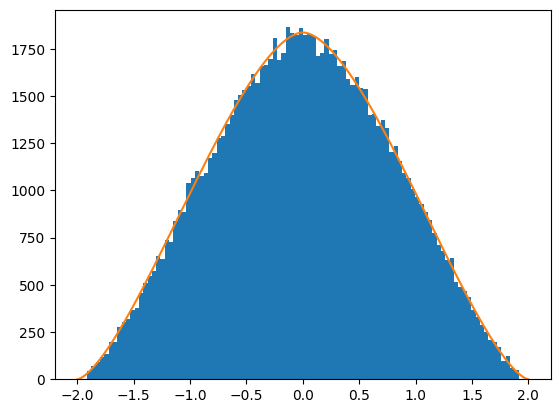

In [ ]:
fig, ax = plt.subplots()
ax.hist(numbers, bins=100)
_ = sns.lineplot(x=x_points, y=x_dist_points, ax=ax)

In [ ]:
x = sp.Symbol('x')
y = sp.Symbol('y')

# f_xcy = 3 / (8 * sp.pi) * (2 - sp.sqrt(x**2 + y**2))
# f_xcy = (1 / sp.sqrt(sp.pi)) * sp.exp(-x**2)
f_xcy = 0.5 * sp.cos(x - y)

# a = - sp.sqrt(4 - x**2)
# b = sp.sqrt(4 - x**2)
# a = -10**5
# b = 10**5
a = -10
b = math.pi / 2


f_x = sp.integrate(f_xcy, (y, a, b))

# a = - sp.sqrt(4 - y**2)
# b = sp.sqrt(4 - y**2)
# a = -10**5
# b = 10**5
a = 0
b = 10


f_y = sp.integrate(f_xcy, (x, a, b))

print(f'f(x) = {f_x}')
print(f'f(y) = {f_y}')
# print(f_x)
# print(f_y)

# условные плотности
f_xiy = f_xcy / f_y
f_yix = f_xcy / f_x
print(f'f(x|y) = {f_xiy}')
print(f'f(y|x) = {f_yix}')
# print(f_xiy)
# print(f_yix)

f(x) = -0.5*sin(x - 1.5707963267949) + 0.5*sin(x + 10)
f(y) = 0.5*sin(y) - 0.5*sin(y - 10)
f(x|y) = 0.5*cos(x - y)/(0.5*sin(y) - 0.5*sin(y - 10))
f(y|x) = 0.5*cos(x - y)/(-0.5*sin(x - 1.5707963267949) + 0.5*sin(x + 10))


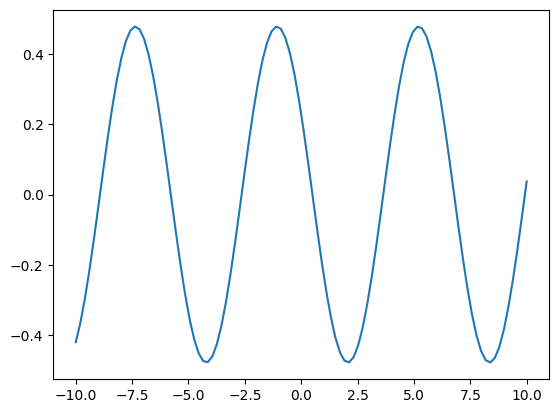

In [ ]:
x_points = np.linspace(-10, 10, num=100)
vals = [float(f_x.subs({x: _x}).evalf()) for _x in x_points]
_ = sns.lineplot(x=x_points, y=vals)

Зависимость / Независимость

In [ ]:
f_yix

0.5*cos(x - y)/(-0.5*sin(x - 1.5707963267949) + 0.5*sin(x + 10))

In [ ]:
f_x * f_y

(0.5*sin(y) - 0.5*sin(y - 10))*(-0.5*sin(x - 1.5707963267949) + 0.5*sin(x + 10))

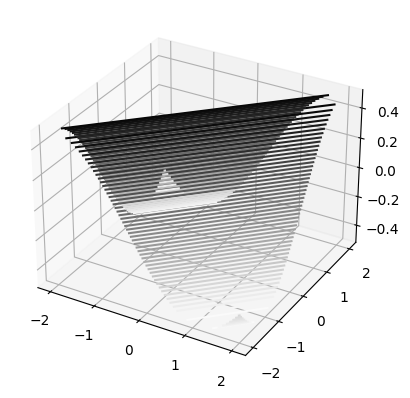

In [ ]:
x_ = np.linspace(-2, 2, 30)
y_ = np.linspace(-2, 2, 30)

X, Y = np.meshgrid(x_, y_)
Z = f_xy(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')

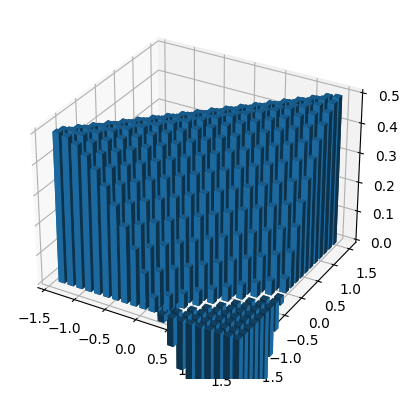

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

x_ = np.linspace(-1.4, 1.4, 20)
y_ = np.linspace(-1.4, 1.4, 20)
xpos, ypos = np.meshgrid(x_, y_)
xpos, ypos = xpos.ravel(), ypos.ravel()

top = f_xy(xpos, ypos)
bottom = np.zeros_like(top)
width = depth = 0.1

ax.bar3d(xpos, ypos, bottom, width, depth, top)

plt.show()

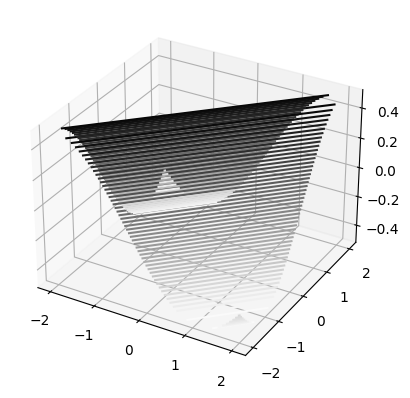

In [ ]:
x_ = np.linspace(-2, 2, 30)
y_ = np.linspace(-2, 2, 30)

X, Y = np.meshgrid(x_, y_)
Z = f_xy(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')

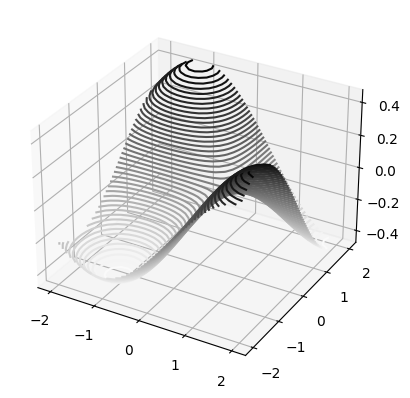

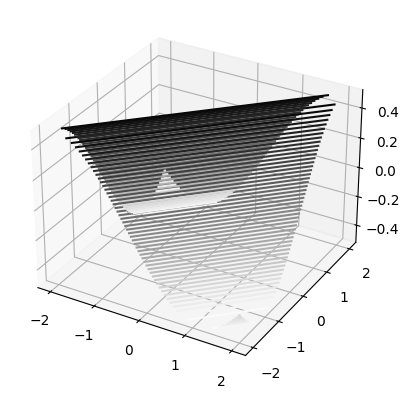

In [ ]:
f_xy = f_x * f_y

x_ = np.linspace(-2, 2, 30)
y_ = np.linspace(-2, 2, 30)

X, Y = np.meshgrid(x_, y_)
Z = [[f_xy.subs({x: _x, y: _y}) for _x in x_] for _y in y_]

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')

f_xy = f_x * f_yix

Z = [[f_xy.subs({x: _x, y: _y}) for _x in x_] for _y in y_]

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')

Точечные и интервальные оценки

In [ ]:
def m_interval(conf, mu, sigma, n):
    t = stats.t.ppf(conf, n - 1)
    delta = t * sigma / np.sqrt(n)

    left_border = mu - delta
    right_border =  mu + delta

    return left_border, right_border


def d_interval(conf, sigma, n):
    alpha1 = (1 - conf) / 2.0
    alpha2 = (1 + conf) / 2.0

    left_border = sigma**2 * (n - 1) / stats.chi2.ppf(alpha2, n - 1)
    right_border = sigma**2 * (n - 1) / stats.chi2.ppf(alpha1, n - 1)

    return left_border, right_border


def sigma_interval(conf, sigma, n):
    alpha1 = (1 - conf) / 2.0
    alpha2 = (1 + conf) / 2.0

    left_border = np.sqrt((n - 1) / stats.chi2.ppf(alpha2, n - 1)) * sigma
    right_border = np.sqrt((n - 1) / stats.chi2.ppf(alpha1, n - 1)) * sigma

    return left_border, right_border

In [ ]:
M_x_emp = np.mean(numbers)
D_x_emp = np.var(numbers)
Std_x_emp = np.std(numbers)

distr_vals_n = 300

print('M:', M_x_emp)
print(m_interval(0.95, M_x_emp, Std_x_emp, distr_vals_n))
print()

print('D:', D_x_emp)
print(d_interval(0.95, Std_x_emp, distr_vals_n))
print()

print('Standard deviation:', Std_x_emp)
print(sigma_interval(0.95, Std_x_emp, distr_vals_n))

M: 0.0029829462946295284
(-0.07062669534769073, 0.07659258793694979)

D: 0.597091369707536
(0.5118498225797758, 0.7056745004275238)

Standard deviation: 0.7727168755162113
(0.7154368054411067, 0.8400443443220863)


## Задание 2

In [ ]:
matrix = np.array(
    [
        [1,2,3,18],
        [1,18,2,3],
        [1,4,3,18],
        [18,6,5,6]
    ],
)

normalized_matrix = matrix / matrix.sum()

In [ ]:
normalized_matrix

array([[0.00917431, 0.01834862, 0.02752294, 0.16513761],
       [0.00917431, 0.16513761, 0.01834862, 0.02752294],
       [0.00917431, 0.03669725, 0.02752294, 0.16513761],
       [0.16513761, 0.05504587, 0.04587156, 0.05504587]])

In [ ]:
def F_x(_i, _j):
    return sum(sum(normalized_matrix[i][j] for i in range(4 if j != _j else _i + 1)) for j in range(_j+1))

In [ ]:
F_x_arr = [[F_x(i, j) for i in range(4)] for j in range(4)]
def inv_F_x(x):
    for i in range(4):
        for j in range(4):
            if F_x_arr[i][j] >= x:
                return i, j

In [ ]:
def _numbers(size):
    return [inv_F_x(rand()) for _ in range(size)]

In [ ]:
numbers = np.array(_numbers(10**6))

Гисторгаммы состовляющих

<AxesSubplot: ylabel='Count'>

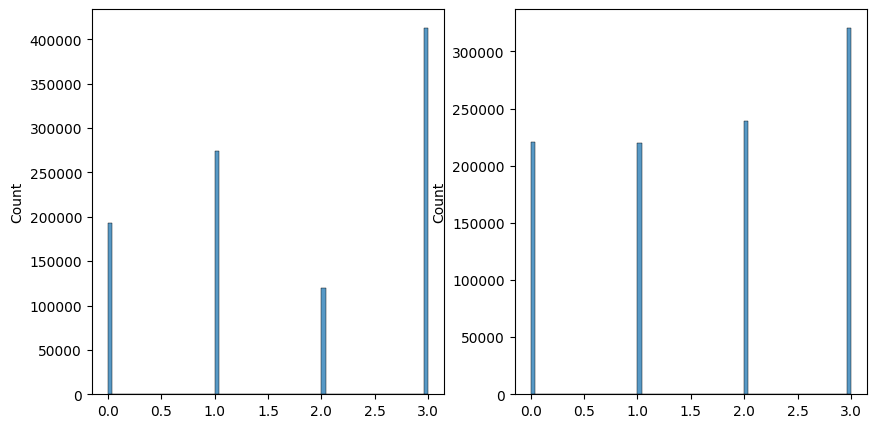

In [ ]:
_, axs = plt.subplots(1,2, figsize=(10, 5))
sns.histplot(numbers[:,0], ax=axs[0])
sns.histplot(numbers[:,1], ax=axs[1])

Точечные и интервальные значения характеристик

In [ ]:
obs_numbers = []
for i in range(4):
        for j in range(4):
            p = normalized_matrix[i][j]
            obs_numbers.append((j*p*16, i*p*16))

In [ ]:
print("M: ", (np.mean(obs_numbers, axis=0)))

M:  [1.75229358 1.66055046]


In [ ]:
print("M: ", (np.mean(numbers, axis=0)))
print("D: ", (np.var(numbers, axis=0)))

M:  [1.753643 1.6593  ]
D:  [1.39695123 1.30824351]


In [ ]:
M_x_emp = np.mean(numbers)
D_x_emp = np.var(numbers)
Std_x_emp = np.std(numbers)

print('M:', M_x_emp)
print(m_interval(0.95, M_x_emp, Std_x_emp, distr_vals_n))
print()

print('D:', D_x_emp)
print(d_interval(0.95, Std_x_emp, distr_vals_n))
print()

print('Standard deviation:', Std_x_emp)
print(sigma_interval(0.95, Std_x_emp, distr_vals_n))

M: 1.7064715
(1.5955909146760607, 1.817352085323939)

D: 1.3548225196877486
(1.1614062796937235, 1.6012016807694016)

Standard deviation: 1.1639684358640265
(1.0776856126411467, 1.265385980943918)


3D гистограмма

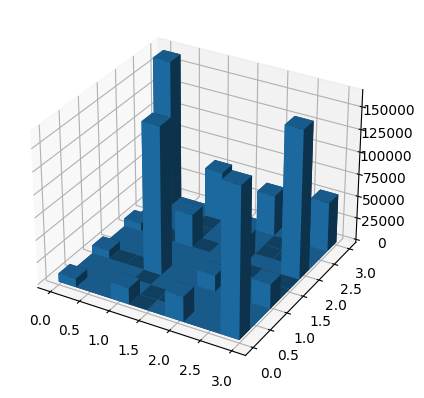

In [ ]:
hist, xedges, yedges = np.histogram2d(
    numbers[:,0].flatten(),
    numbers[:,1].flatten(),
    bins=10,
)

xpos, ypos = np.meshgrid(xedges[:-1], yedges[:-1], indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

dx = dy = 0.3 * np.ones_like(zpos)
dz = hist.ravel()

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

plt.show()

Соответсвие полученного распределения ожидаемому

In [ ]:
def find_chi_descrete(samples, uncond_dist):
    bins = np.histogram2d(
        samples[:,0].flatten(),
        samples[:,1].flatten(),
        bins=4,
        range=[[0, 4], [0, 4]]
    )[0].transpose()
    bins = bins / bins.sum()

    chis = []
    for i in range(4):
        for j in range(4):
            chi = ((bins[i][j] - uncond_dist[i][j]) ** 2) / uncond_dist[i][j]
            chis.append(chi)

    return len(uncond_dist) * sum(chis)

In [ ]:
find_chi_descrete(numbers, normalized_matrix)

0.00012518526953333355

Зависимость / Независимость

In [ ]:
normalized_matrix

array([[0.00917431, 0.01834862, 0.02752294, 0.16513761],
       [0.00917431, 0.16513761, 0.01834862, 0.02752294],
       [0.00917431, 0.03669725, 0.02752294, 0.16513761],
       [0.16513761, 0.05504587, 0.04587156, 0.05504587]])

In [ ]:
fx = normalized_matrix.sum(axis=1)
fy = normalized_matrix.sum(axis=0)
ff = [[el] for el in fx.tolist()] * fy
ff

array([[0.04242067, 0.06060096, 0.02626042, 0.09090144],
       [0.04242067, 0.06060096, 0.02626042, 0.09090144],
       [0.04595573, 0.06565104, 0.02844878, 0.09847656],
       [0.06186348, 0.0883764 , 0.03829644, 0.1325646 ]])

In [ ]:
chis = []
for i in range(4):
    for j in range(4):
        chi = ((ff[i][j] - normalized_matrix[i][j]) ** 2) / normalized_matrix[i][j]
        chis.append(chi)

len(normalized_matrix) * sum(chis)

3.9186005358438574